## 한글 폰트 설정

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 노트북 안에 그래프를 그리기 위해
%matplotlib inline

# 그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 ggplot 스타일을 사용
plt.style.use('ggplot')

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

# 경고
import warnings
warnings.filterwarnings('ignore')

In [2]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux
        # colab에서는 runtime을 <꼭> 재시작 해야합니다.
        # 런타임을 재시작 하지 않고 폰트 설치를 하면 기본 설정 폰트가 로드되어 한글이 깨집니다.
        # !apt-get update -qq
        # !apt-get install fonts-nanum -qq  > /dev/null

        import matplotlib.font_manager as fm

        fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
        font = fm.FontProperties(fname=fontpath, size=9)
        fm._rebuild()
        font_family = "NanumBarunGothic"
    return font_family

In [3]:
# 시각화를 위한 폰트설정
import matplotlib.pyplot as plt

# 위에서 만든 함수를 통해 시스템 폰트를 불러와서 font_family 라는 변수에 할당
font_family = get_font_family()

# 폰트설정
plt.rc("font", family=get_font_family())

# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)

# 그래프 스타일 설정
plt.style.use('ggplot')

# 그래프에 retina display 적용
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


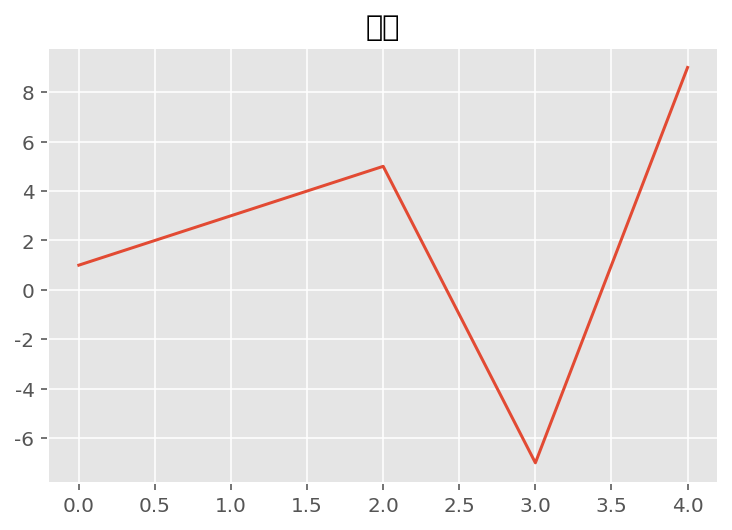

In [4]:
# 한글폰트 확인
pd.Series([1,3,5,-7,9]).plot(title="한글")

# Chipotle 데이터 연습문제

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# 데이터 불러오기
chipo = pd.read_csv("/content/drive/MyDrive/2022-01/빅데이터마이닝/chipotle.csv")

chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [7]:
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [8]:
chipo.describe()

,order_id,quantity
count,4622.000000,4622.000000
mean,927.254868,1.075725
std,528.890796,0.410186
min,1.000000,1.000000
25%,477.250000,1.000000
50%,926.000000,1.000000
75%,1393.000000,1.000000
max,1834.000000,15.000000


## 1)  가장 잘 팔리지 않은 (주문량이 가장 적은) 음식 10개

In [9]:
# 주문량이 적은 음식 TOP 10 보여주기
order_quantity = chipo.groupby('item_name')['quantity'].sum()
order_sorted = order_quantity.sort_values(ascending=True)[0:10]
print(order_sorted)

item_name
Carnitas Salad                       1
Veggie Crispy Tacos                  1
Chips and Mild Fresh Tomato Salsa    1
Crispy Tacos                         2
Salad                                2
Bowl                                 4
Steak Salad                          4
Veggie Salad                         6
Carnitas Salad Bowl                  6
Burrito                              6
Name: quantity, dtype: int64


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


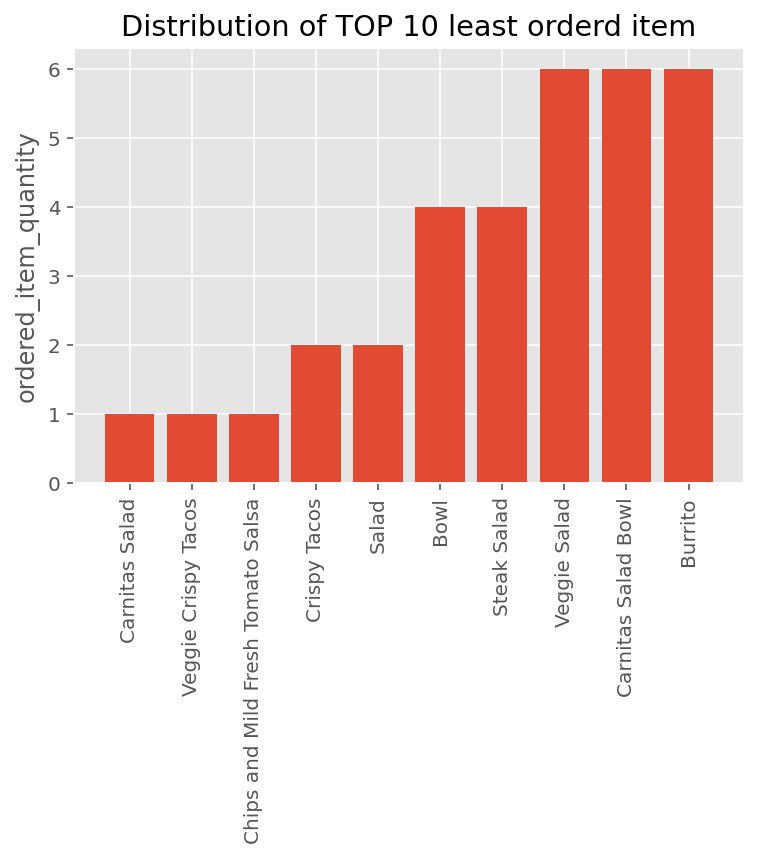

In [10]:
item_list = order_sorted.index.tolist()
item_qty = order_sorted.values.tolist()
 
plt.bar(item_list, item_qty, align='center')
plt.ylabel('ordered_item_quantity')
plt.title('Distribution of TOP 10 least orderd item')
plt.xticks(rotation=90) 
plt.show()

## 2)  가격이 가장 저렴한 음식 5개를 보여주세요. 

In [11]:
# item_price의 $ 문자 삭제
chipo['item_price'] = chipo['item_price'].apply(lambda x:float(x[1:]))

In [12]:
# 한 개의 음식이 주문 된 경우만을 찾아 음식별 가장 낮은 가격 찾기
chipo_one_item = chipo[chipo.quantity == 1]
price_per_item = chipo_one_item.groupby('item_name')['item_price'].min() 

# 가격이 낮은 순으로 TOP 5 음식 보여주기
inexpensive_top5 = price_per_item.sort_values(ascending = True)[:5]
print(inexpensive_top5)

item_name
Bottled Water        1.09
Canned Soda          1.09
Canned Soft Drink    1.25
Side of Chips        1.69
Chips                1.99
Name: item_price, dtype: float64


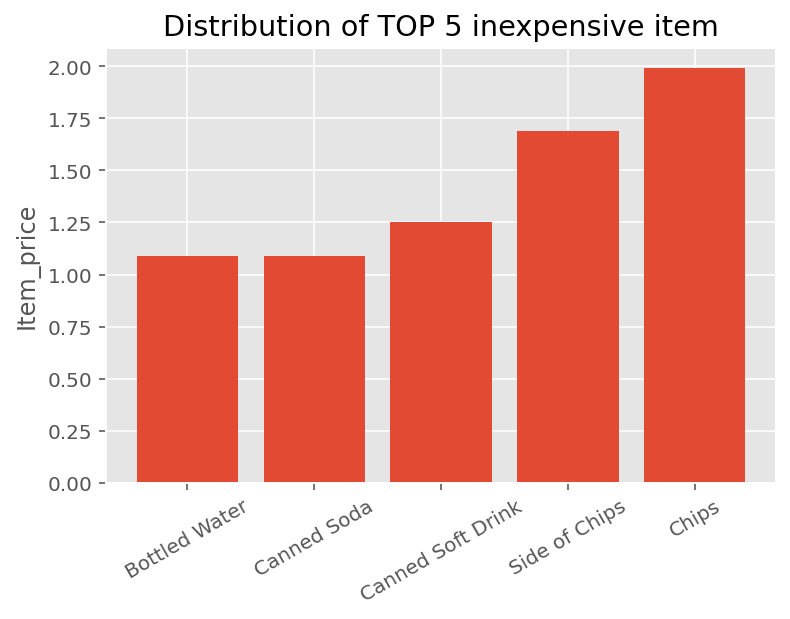

In [13]:
# 음식 가격 분포 그래프 출력
item_list = inexpensive_top5.index.tolist()
item_qty = inexpensive_top5.values.tolist()
 
plt.bar(item_list, item_qty, align='center')
plt.ylabel('Item_price')
plt.title('Distribution of TOP 5 inexpensive item')
plt.xticks(rotation=30)
plt.show()

# 데이콘 구내식당식사인원예측 데이터 연습문제

In [14]:
# 데이터 불러오기
data = pd.read_csv("/content/drive/MyDrive/2022-01/빅데이터마이닝/구내식당식사인원예측_train.csv", encoding='cp949')
data.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039,331
1,2016-02-02,화,2601,50,173,319,0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867,560
2,2016-02-03,수,2601,56,180,111,0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017,573
3,2016-02-04,목,2601,104,220,355,0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978,525
4,2016-02-05,금,2601,278,181,34,0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925,330


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   일자              1205 non-null   object
 1   요일              1205 non-null   object
 2   본사정원수           1205 non-null   int64 
 3   본사휴가자수          1205 non-null   int64 
 4   본사출장자수          1205 non-null   int64 
 5   본사시간외근무명령서승인건수  1205 non-null   int64 
 6   현본사소속재택근무자수     1205 non-null   int64 
 7   조식메뉴            1205 non-null   object
 8   중식메뉴            1205 non-null   object
 9   석식메뉴            1205 non-null   object
 10  중식계             1205 non-null   int64 
 11  석식계             1205 non-null   int64 
dtypes: int64(7), object(5)
memory usage: 113.1+ KB


In [16]:
data.describe()

,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계
count,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000
mean,2807.815768,157.913693,241.142739,274.117012,43.506224,890.334440,461.772614
std,171.264404,144.190572,43.532298,246.239651,109.937400,209.505057,139.179202
min,2601.000000,23.000000,41.000000,0.000000,0.000000,296.000000,0.000000
25%,2645.000000,71.000000,217.000000,4.000000,0.000000,758.000000,406.000000
50%,2760.000000,105.000000,245.000000,299.000000,0.000000,879.000000,483.000000
75%,2962.000000,185.000000,272.000000,452.000000,0.000000,1032.000000,545.000000
max,3305.000000,1224.000000,378.000000,1044.000000,533.000000,1459.000000,905.000000


In [17]:
data.isnull().sum()

일자                0
요일                0
본사정원수             0
본사휴가자수            0
본사출장자수            0
본사시간외근무명령서승인건수    0
현본사소속재택근무자수       0
조식메뉴              0
중식메뉴              0
석식메뉴              0
중식계               0
석식계               0
dtype: int64

In [18]:
data.corr()

,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계
본사정원수,1.000000,0.244666,-0.061688,0.146544,0.452293,-0.115529,-0.173852
본사휴가자수,0.244666,1.000000,-0.273318,-0.230789,0.065397,-0.391975,-0.316894
본사출장자수,-0.061688,-0.273318,1.000000,-0.308757,-0.352643,-0.512680,-0.188164
본사시간외근무명령서승인건수,0.146544,-0.230789,-0.308757,1.000000,0.156792,0.535611,0.571168
현본사소속재택근무자수,0.452293,0.065397,-0.352643,0.156792,1.000000,0.076509,-0.057534
중식계,-0.115529,-0.391975,-0.512680,0.535611,0.076509,1.000000,0.508287
석식계,-0.173852,-0.316894,-0.188164,0.571168,-0.057534,0.508287,1.000000


## 구내식당의 요일별 점심, 저녁식사 패턴을 자유롭게 분석해 보시오

In [19]:
# 요일별 점심식사 패턴
day_lunch = data.groupby('요일')['중식메뉴'].sum()
lunch_sorted = day_lunch.sort_values(ascending=False)[0:3]
print(lunch_sorted)

요일
수    카레덮밥 (쌀,현미흑미:국내산) 팽이장국  치킨핑거 (닭고기:국내산) 쫄면야채무침 ...
월    쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개  쇠불고기 (쇠고기:호주산) 계란찜 ...
목    쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국  주꾸미볶음  부추전  시금치나물  ...
Name: 중식메뉴, dtype: object


요일
금    157520
목    201054
수    216346
월    275784
화    222149
Name: 중식계, dtype: int64


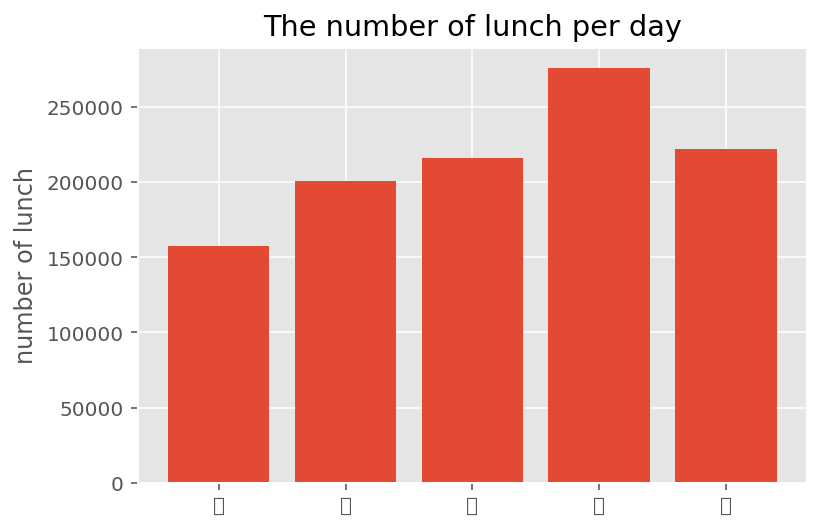

In [20]:
lunch_per_day = data.groupby('요일')['중식계'].sum()

print(lunch_per_day)

item_list = lunch_per_day.index.tolist() #x축
item_qty = lunch_per_day.values.tolist() #y축
 
plt.bar(item_list, item_qty, align='center')
plt.ylabel('number of lunch')
plt.title('The number of lunch per day')
plt.show()

In [21]:
# 요일별 저녁식사 패턴
day_dinner = data.groupby('요일')['석식메뉴'].sum()
day_dinner

요일
금    쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...
목    미니김밥*겨자장 (쌀,현미흑미:국내산) 우동  멕시칸샐러드  군고구마  무피클  포...
수    쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개  황태양념구이 (황태:러시아산) 고기...
월    쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장  자반고등어구이  두부조림  건파래무침 ...
화    콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국  유산슬 (쇠고기:호주산) 아삭고추무...
Name: 석식메뉴, dtype: object

요일
수     86904
금     97600
목    117218
화    124831
월    129883
Name: 석식계, dtype: int64


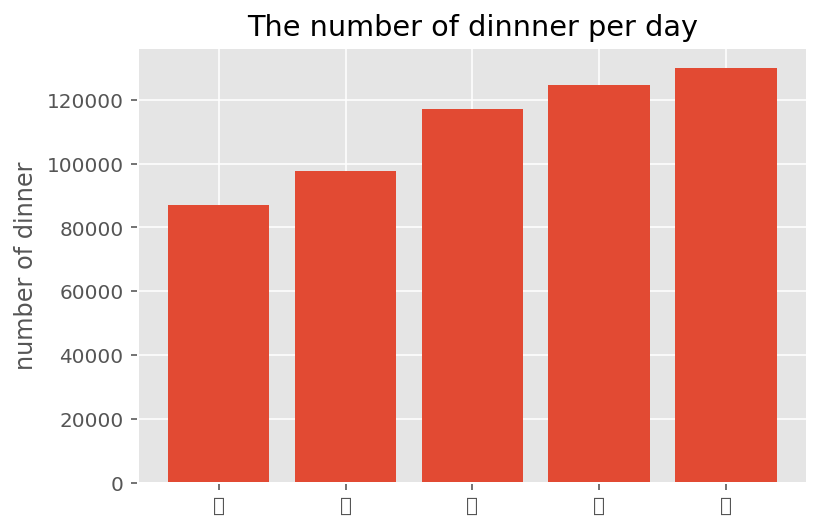

In [22]:
dinner_per_day = data.groupby('요일')['석식계'].sum().sort_values(ascending=True)

print(dinner_per_day)

item_list = dinner_per_day.index.tolist() #x축
item_qty = dinner_per_day.values.tolist() #y축
 
plt.bar(item_list, item_qty, align='center')
plt.ylabel('number of dinner')
plt.title('The number of dinnner per day')
plt.show()